I will be following along with the StatQuest video: 
# First lets read in the data from t-Test

In [89]:
# Stats
from scipy.stats import chi2_contingency
from scipy.stats import norm
import scipy.stats as stats

# Number manips
import pandas as pd
import numpy as np
import math
import random as rand

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [8]:
df = pd.read_csv("./t-Test/sc_toy_data/fibrosis_toy_data.csv")
print(df.shape)
df.head()

(201, 1341)


,sham_rep1_AAACGGGAGAGTTGGC-1,sham_rep1_AAACGGGCATCTGGTA-1,sham_rep1_AAAGATGTCACCGTAA-1,sham_rep1_AAAGATGTCGGTGTCG-1,sham_rep1_AAAGATGTCTTGTCAT-1,sham_rep1_AAAGCAACAGACGCTC-1,sham_rep1_AAAGTAGGTTACGTCA-1,sham_rep1_AAATGCCTCGAGCCCA-1,sham_rep1_AACACGTTCTCAAACG-1,sham_rep1_AACTCCCTCTCAAACG-1,...,TAC_rep2_TTGACTTTCAGATAAG-1,TAC_rep2_TTGCCGTTCGACGGAA-1,TAC_rep2_TTGGCAAAGCCAGAAC-1,TAC_rep2_TTGGCAACATCGTCGG-1,TAC_rep2_TTGGCAAGTAGCGCTC-1,TAC_rep2_TTGGCAAGTATGCTTG-1,TAC_rep2_TTGTAGGGTGATGTGG-1,TAC_rep2_TTTACTGCAAGTTAAG-1,TAC_rep2_TTTACTGGTACTTCTT-1,TAC_rep2_TTTGGTTAGGGATGGG-1
Ccl21a,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,6.058526
Retnla,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
Igfbp5,0.0,0.0,0.000000,0.0,0.0,3.178835,0.0,0.0,0.0,0.0,...,2.161078,0.0,3.379476,0.0,0.0,0.0,1.699328,0.0,2.907867,1.642900
Ccl5,0.0,0.0,4.273254,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
Ccl7,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.073017,0.000000


I'm going to define a function like in R that gives me a nice summary of data

{'min': 0.0, 'q25': 0.0, 'median': 0.0, 'average': 0.5691428843851365, 'q75': 0.0, 'max': 5.66956038590428}


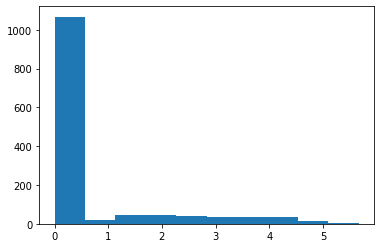

In [15]:
def summary(someList):
    someList = np.array(someList)
    
    minimum = someList.min()
    quantile25 = np.quantile(someList, 0.25)
    average = np.average(someList)
    median = np.median(someList)
    quantile75 = np.quantile(someList, 0.75)
    maximum = someList.max()
    
    return({'min':minimum,
            'q25':quantile25, 
            'median':median, 
            'average':average, 
            'q75':quantile75, 
            'max':maximum})
    
igfbp5 = df.loc['Igfbp5',]
print(summary(igfbp5))
plt.hist(igfbp5)
plt.show()

Looking at the top first 5 genes, we have tonssss of zeros (I wonder how R gets around that!)

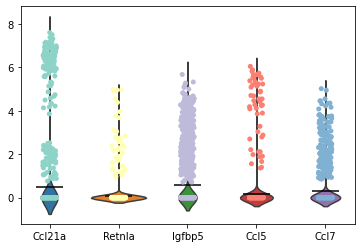

In [86]:
data = df.iloc[0:5,].T
sns.stripplot(palette='Set3', data = data)
ax = sns.violinplot(pallet='Set3', data = data, inner=None)
ax.hlines(y=data.apply(lambda x: summary(x)['average'], axis=0), xmin=[-0.2+x for x in range(5)], xmax=[0.2+x for x in range(5)], colors='black')

In [87]:
# I can get the values of the averages of each gene like so
data.apply(lambda x: summary(x)['average'], axis=0)

Ccl21a    0.489111
Retnla    0.078761
Igfbp5    0.569143
Ccl5      0.154523
Ccl7      0.288328
dtype: float64

---
# Tangent!!!
I kind of want to see what distribution best fits that first gene ```igfbp5```, so lets sample from several different distributions and then do a qqplot!

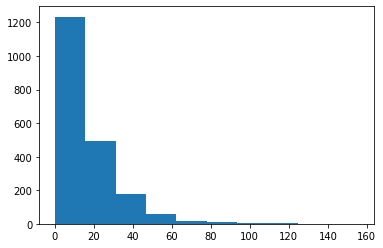

In [170]:
#                                     number of successes,probability of success,samples
nb_dist = np.random.negative_binomial(1, 0.06, 2000)
plt.hist(nb_dist)
plt.show()

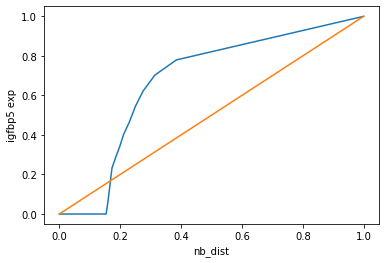

In [171]:
def my_qqplot(data1, data2, xlab = 'first', ylab= 'second', n_quantiles = 50):
    quantiles1 = [np.quantile(data1, x) for x in np.linspace(0,1,n_quantiles)]
    quantiles2 = [np.quantile(data2, x) for x in np.linspace(0,1,n_quantiles)]
    thing = plt.plot(np.array(quantiles1)/max(quantiles1), np.array(quantiles2)/max(quantiles2))
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    return thing

my_qqplot(nb_dist, igfbp5, xlab='nb_dist', ylab='igfbp5 exp')
plt.plot((0,1), (0,1))
plt.show()

# Problem for neural net >:)
---
Anywho, whenever I pick this up, I need to look up t-Test comparison tests, or even ANOVA. I think what I should do is pick one gene, and then split it up based on sham or TAC!

In [172]:
igfbp5

sham_rep1_AAACGGGAGAGTTGGC-1    0.000000
sham_rep1_AAACGGGCATCTGGTA-1    0.000000
sham_rep1_AAAGATGTCACCGTAA-1    0.000000
sham_rep1_AAAGATGTCGGTGTCG-1    0.000000
sham_rep1_AAAGATGTCTTGTCAT-1    0.000000
                                  ...   
TAC_rep2_TTGGCAAGTATGCTTG-1     0.000000
TAC_rep2_TTGTAGGGTGATGTGG-1     1.699328
TAC_rep2_TTTACTGCAAGTTAAG-1     0.000000
TAC_rep2_TTTACTGGTACTTCTT-1     2.907867
TAC_rep2_TTTGGTTAGGGATGGG-1     1.642900
Name: Igfbp5, Length: 1341, dtype: float64